# Genie mutation data

## Setup

In [1]:
library("ggplot2")
library(data.table)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


## Get data

In [2]:
mutation_data <- read.table("../../data/genie_v15/data_mutations_extended.txt", sep="\t", quote="", head=TRUE)

In [3]:
head(mutation_data)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,⋯,FILTER,Polyphen_Prediction,Polyphen_Score,SIFT_Prediction,SIFT_Score,SWISSPROT,n_depth,t_depth,Annotation_Status,mutationInCis_Flag
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<dbl>,<lgl>,<int>,<int>,<chr>,<chr>
1,KRAS,3845,JHU,GRCh37,12,25398285,25398285,+,missense_variant,Missense_Mutation,⋯,PASS,probably_damaging,0.991,deleterious,0.04,NA,NA,1623,SUCCESS,False
2,BRAF,673,JHU,GRCh37,7,140453136,140453136,+,missense_variant,Missense_Mutation,⋯,PASS,probably_damaging,0.963,deleterious,0.00,NA,NA,1031,SUCCESS,False
3,EGFR,1956,JHU,GRCh37,7,55249071,55249071,+,missense_variant,Missense_Mutation,⋯,PASS,probably_damaging,1.000,deleterious,0.00,NA,NA,692,SUCCESS,False
4,TP53,7157,JHU,GRCh37,17,7577120,7577120,+,missense_variant,Missense_Mutation,⋯,PASS,possibly_damaging,0.643,tolerated,0.13,NA,NA,930,SUCCESS,False
5,NRAS,4893,JHU,GRCh37,1,115256529,115256529,+,missense_variant,Missense_Mutation,⋯,PASS,benign,0.251,tolerated,0.06,NA,NA,2277,SUCCESS,False
6,PIK3CA,5290,JHU,GRCh37,3,178952085,178952085,+,missense_variant,Missense_Mutation,⋯,PASS,benign,0.085,tolerated,0.11,NA,NA,1064,SUCCESS,False


In [4]:
colnames(mutation_data)

[1] "Hugo_Symbol"                   "Entrez_Gene_Id"               
 [3] "Center"                        "NCBI_Build"                   
 [5] "Chromosome"                    "Start_Position"               
 [7] "End_Position"                  "Strand"                       
 [9] "Consequence"                   "Variant_Classification"       
[11] "Variant_Type"                  "Reference_Allele"             
[13] "Tumor_Seq_Allele1"             "Tumor_Seq_Allele2"            
[15] "dbSNP_RS"                      "dbSNP_Val_Status"             
[17] "Tumor_Sample_Barcode"          "Matched_Norm_Sample_Barcode"  
[19] "Match_Norm_Seq_Allele1"        "Match_Norm_Seq_Allele2"       
[21] "Tumor_Validation_Allele1"      "Tumor_Validation_Allele2"     
[23] "Match_Norm_Validation_Allele1" "Match_Norm_Validation_Allele2"
[25] "Verification_Status"           "Validation_Status"            
[27] "Mutation_Status"               "Sequencing_Phase"             
[29] "Sequence_Source"               "Validation_Method"            
[31] "Score"                         "BAM_File"                     
[33] "Sequencer"                     "t_ref_count"                  
[35] "t_alt_count"                   "n_ref_count"                  
[37] "n_alt_count"                   "HGVSc"                        
[39] "HGVSp"                         "HGVSp_Short"                  
[41] "Transcript_ID"                 "RefSeq"                       
[43] "Protein_position"              "Codons"                       
[45] "Exon_Number"                   "gnomAD_AF"                    
[47] "gnomAD_AFR_AF"                 "gnomAD_AMR_AF"                
[49] "gnomAD_ASJ_AF"                 "gnomAD_EAS_AF"                
[51] "gnomAD_FIN_AF"                 "gnomAD_NFE_AF"                
[53] "gnomAD_OTH_AF"                 "gnomAD_SAS_AF"                
[55] "FILTER"                        "Polyphen_Prediction"          
[57] "Polyphen_Score"                "SIFT_Prediction"              
[59] "SIFT_Score"                    "SWISSPROT"                    
[61] "n_depth"                       "t_depth"                      
[63] "Annotation_Status"             "mutationInCis_Flag"

In [5]:
nrow(mutation_data)

[1] 1840311

There are 1.840.311 mutations registrered.

### Overview

*Hugo_Symbol - ID: Official name of an allele*

Entrez_Gene_Id - ID: Identifier in the NCBI database

*Center - One or more genome sequencing center reporting the variant*

*NCBI_Build - Reference: The reference genome used for the alignment*

Chromosome - Position: The affected chromosome

Start_Position - Position: Mutation start coordinate

End_Position - Position: Mutation end coordinate

Strand - Position: Genomic strand of the reported allele

*Consequence - Consequence type of this variant;   sequence ontology terms*

*Variant_Classification - Translational effect of variant allele*

*Variant_Type - Type of mutation (SNP, DNP, TNP, ONP, INS, DEL, or Consolidated)*

Reference_Allele - Reference: The plus strand reference allele at this position.

Tumor_Seq_Allele1 - Primary data genotype for tumor sequencing (discovery) allele 1

Tumor_Seq_Allele2 - Tumor sequencing (discovery) allele 2

dbSNP_RS - ID: The rs-IDs from the dbSNP database

dbSNP_Val_Status - Validation: The dbSNP validation status is reported as a semicolon-separated list of statuses.

*Tumor_Sample_Barcode - Aliquot barcode for the tumor sample*

Matched_Norm_Sample_Barcode - Aliquot barcode for the matched normal sample

Match_Norm_Seq_Allele1 - Primary data genotype.

Match_Norm_Seq_Allele2 - Matched normal sequencing allele 2

Tumor_Validation_Allele1 - Secondary data from orthogonal technology.

Tumor_Validation_Allele2 - Secondary data from orthogonal technology.

Match_Norm_Validation_Allele1 - Secondary data from orthogonal technolog

Match_Norm_Validation_Allele2 - Secondary data from orthogonal technology

Verification_Status - Second pass results from independent attempt using same methods as primary data source

Validation_Status - Second pass results from orthogonal technology

*Mutation_Status - An assessment of the mutation as somatic, germline, LOH, post transcriptional modification, unknown, or none*

Sequencing_Phase - TCGA sequencing phase 

*Sequence_Source - Molecular assay type used to produce the analytes used for sequencing*

Validation_Method - The assay platforms used for the validation call

Score - Not in use

BAM_File - Not in use

Sequencer - Instrument used to produce primary sequence data

t_ref_count - Read depth supporting the reference allele in tumor BAM

t_alt_count - Read depth supporting the variant allele in tumor BAM

n_ref_count - Read depth supporting the reference allele in normal BAM

n_alt_count - Read depth supporting the variant allele in normal BAM 

HGVSc - The coding sequence of the variant in HGVS recommended format

HGVSp - The protein sequence of the variant in HGVS recommended format. "p.=" signifies no change in the protein

HGVSp_Short - Same as the HGVSp column, but using 1-letter amino-acid codes

Transcript_ID - ID: Ensembl ID of the transcript affected by the variant

RefSeq - RefSeq identifier for this transcript

Protein_position - Relative position of affected amino acid in protein.

Codons - The alternative codons with the variant base in upper case

Exon_Number - The exon number (out of total number)

*gnomAD_AF* - Allele Frequency

gnomAD_AFR_AF - African

*gnomAD_AMR_AF* - Admixed American

gnomAD_ASJ_AF - Ashkenazi Jewish population

gnomAD_EAS_AF - East Asian

gnomAD_FIN_AF - Finnish

gnomAD_NFE_AF - Non-finnish European

gnomAD_OTH_AF - other

gnomAD_SAS_AF - South Asian

(Short-hand interpretation from https://annovar.openbioinformatics.org/en/latest/user-guide/filter/ and https://support.illumina.com/help/BaseSpace_VariantInterpreter_OLH_001129/Content/Source/Informatics/VariantSW/AlleleFrequencyData_swVI.htm)

FILTER - Copied from input VCF. This includes filters implemented directly by the variant caller and other external software used in the DNA-Seq pipeline

Polyphen_Prediction - ?

Polyphen_Score - ?

SIFT_Prediction - DANGER? (D- deleterious, T-tolerable, ggogle anovar)

SIFT_Score - ?

SWISSPROT - ID: UniProtKB/Swiss-Prot accession

n_depth - Read depth across this locus in normal BAM

t_depth - Read depth across this locus in tumor BAM

Annotation_Status - ?

mutationInCis_Flag - ?


In [8]:
table(mutation_data$SIFT_Prediction)


                                          deleterious 
                    642444                     649421 
deleterious_low_confidence                  tolerated 
                     65371                     424199 
  tolerated_low_confidence 
                     58876 

#### Overview results

From the columns available, and information found for each one through the documentation (https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/) there are a few columns of particular interest. These columns are:

* Hugo_Symbol
* Center
* NCBI_Build
* Consequence
* Variant_Classification
* Variant_Type
* Tumor_Sample_Barcode
* Mutation_Status
* Sequence_Source

We now examine the data in each of these columns a little further.

#### Hugo_Symbol

HUGO - Human Genome Organisation

The HUGO Gene Nomenclature Comittee (HGNC) - The resource for approved guman gene nomenclature

The Hugo_Symbol column contains the approved nomenclature for the given locus, in accordance with the HGNC. "Unknown" is used for regions that do not correspond to a gene

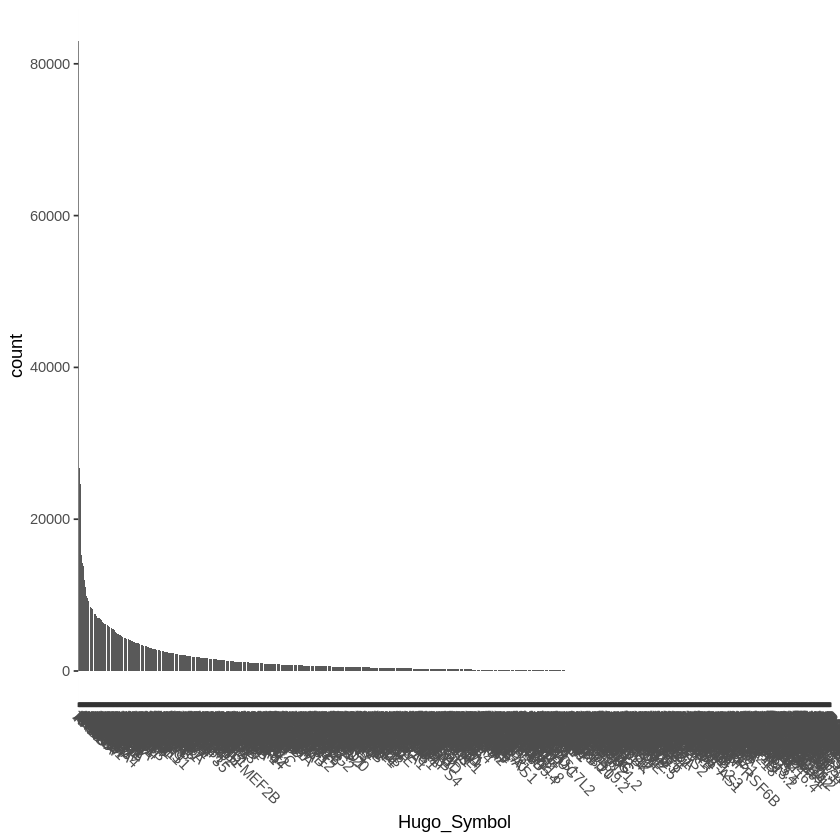

In [7]:
# We create an empty list for holding the number of each symbol
count_list <- list()
# From the mutation data we create a list with all unique HUGO symbols
symbol_list <- unique(mutation_data[['Hugo_Symbol']])

# We loop through each unique hugo symbol and count how many occurances there are
# while saving the result in our count list
for (x in symbol_list) {
    len <- length(count_list)
    count <- length(which(mutation_data$Hugo_Symbol==x))
    count_list[len+1] <- count
}

# we create the HUGO table from our two lists and rename the columns
hugo_table <- data.frame(symbol_list, unlist(count_list))
names(hugo_table) <- c("symbol", "count")

# Now we order the table in descending order
hugo_table <- hugo_table[order(-hugo_table$count), ]

# we define the order of teh positions from the sorted table
positions <- hugo_table$symbol

# And feed the data, and the defined positions to ggplot
ggplot(mutation_data, aes(x=Hugo_Symbol)) + geom_bar() + scale_x_discrete(limits = positions, guide = guide_axis(angle = -45))

From this we can see that our data is very biased. This might be explained by which gene panels were used.

#### Center

The name of the center that reported the data.

[1] 19

[1] "JHU"  "DFCI" "GRCC" "NKI"  "MSK"  "UHN"  "VICC" "MDA"  "WAKE" "YALE"
[11] "UCSF" "CRUK" "CHOP" "VHIO" "SCI"  "COLU" "UCHI" "DUKE" "PROV"

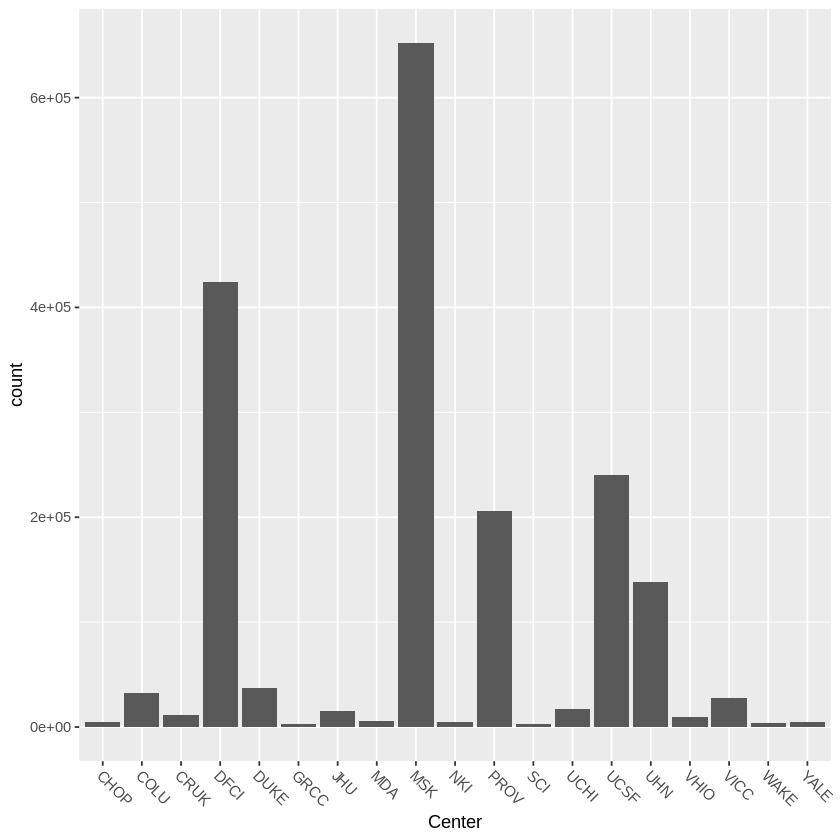

In [8]:
# How many unique centers are there?
length(unique(mutation_data[['Center']]))
# What are they called?
unique(mutation_data[['Center']])

# How is the data distributed across these centers?
ggplot(mutation_data, aes(x=Center)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -45))

Again we see that our data is not equally distributed. The majority of the data comes from five centers, with the biggest contributor being the MSK center.

#### NCBI_Build

NCIB build contains information as to what reference genome was used to gain the mutation data.

In [9]:
# How many unique reference genomes are there?
length(unique(mutation_data[['NCBI_Build']]))
# What are they called?
unique(mutation_data[['NCBI_Build']])

[1] 1

[1] "GRCh37"

Only the GRCh37 has been used as a reference genome. This is nice to know as the data in this way is uniform.

#### Consequence

The consequence of the registrered mutation. The terminology is taken from sequence oncology (http://www.sequenceontology.org/)

[1] 127

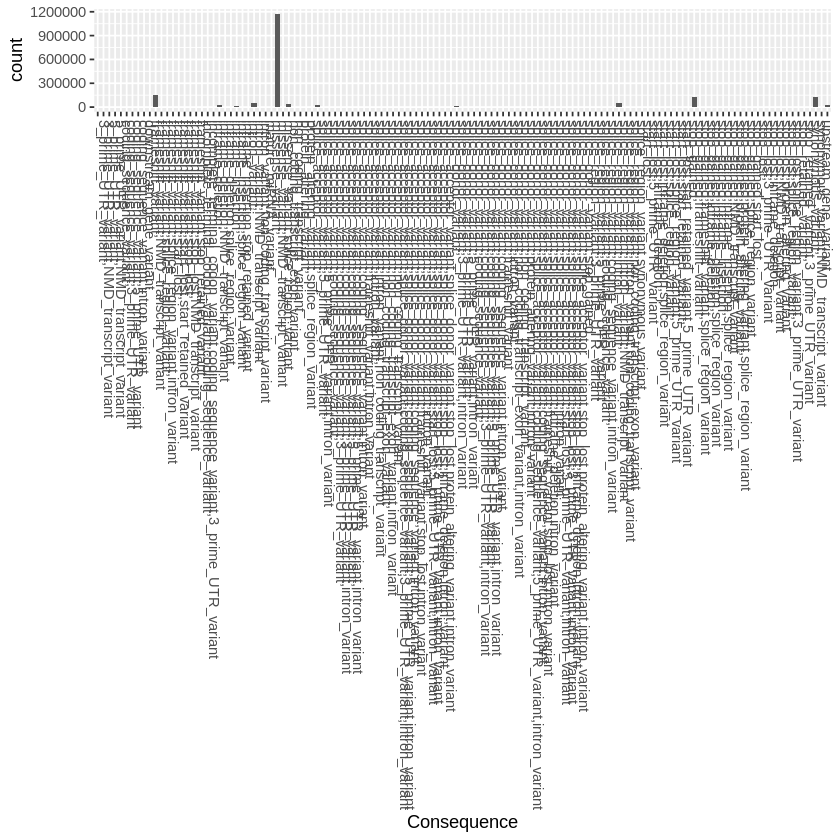

In [10]:
# How many terms are there?
length(unique(mutation_data[['Consequence']]))

# How is the data distributed across these consequences?
ggplot(mutation_data, aes(x=Consequence)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -90))

Further expertise is needed to understand this. It also looks like some application of regularised expressions/finding common terms to more broadly classify these mutations could yield interesting data.

#### Variant_Classification

A description of the Translational effect of the variant allele.

[1] 17

[1] "Missense_Mutation"      "Nonsense_Mutation"      "Splice_Site"           
 [4] "Frame_Shift_Del"        "Intron"                 "Silent"                
 [7] "Splice_Region"          "In_Frame_Del"           "3'UTR"                 
[10] "Frame_Shift_Ins"        "In_Frame_Ins"           "RNA"                   
[13] "5'UTR"                  "Translation_Start_Site" "5'Flank"               
[16] "3'Flank"                "Nonstop_Mutation"

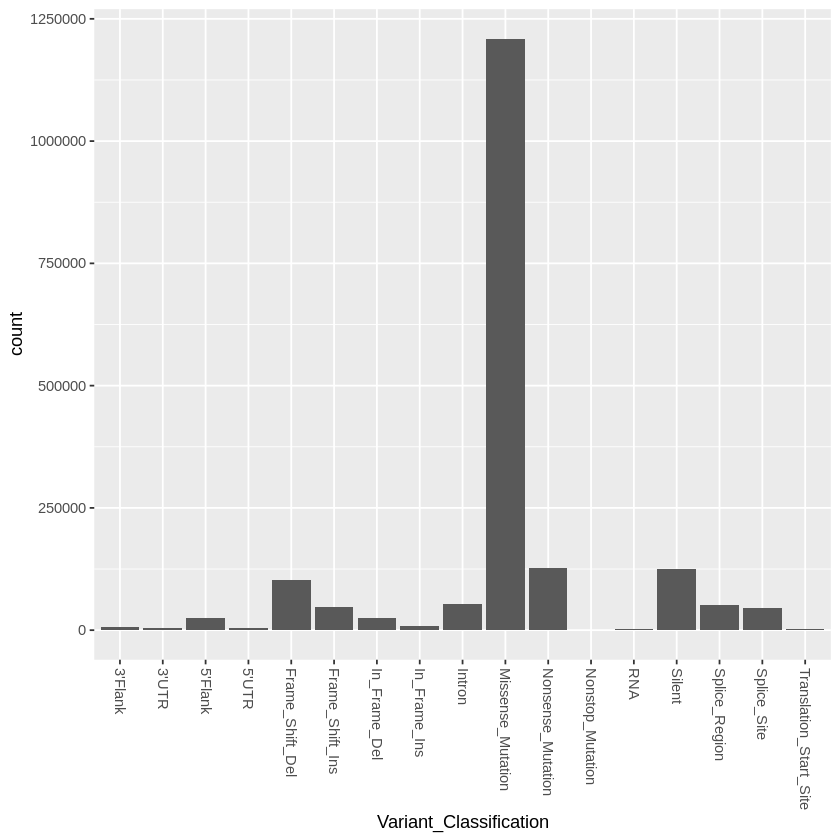

In [11]:
# How many classifications are there?
length(unique(mutation_data[['Variant_Classification']]))
# What are the classifications?
unique(mutation_data[['Variant_Classification']])

# How is the data distributed across these classifications?
ggplot(mutation_data, aes(x=Variant_Classification)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -90))

The majority of our mutations seem to be missense mutations - point mutations that change the 

#### Variant_Type

The Type of mutation, is it a single- double- triple nucleotide change, a deltetion, insertion of transversal?

[1] 6

[1] "SNP" "DEL" "INS" "DNP" "TNP" "ONP"

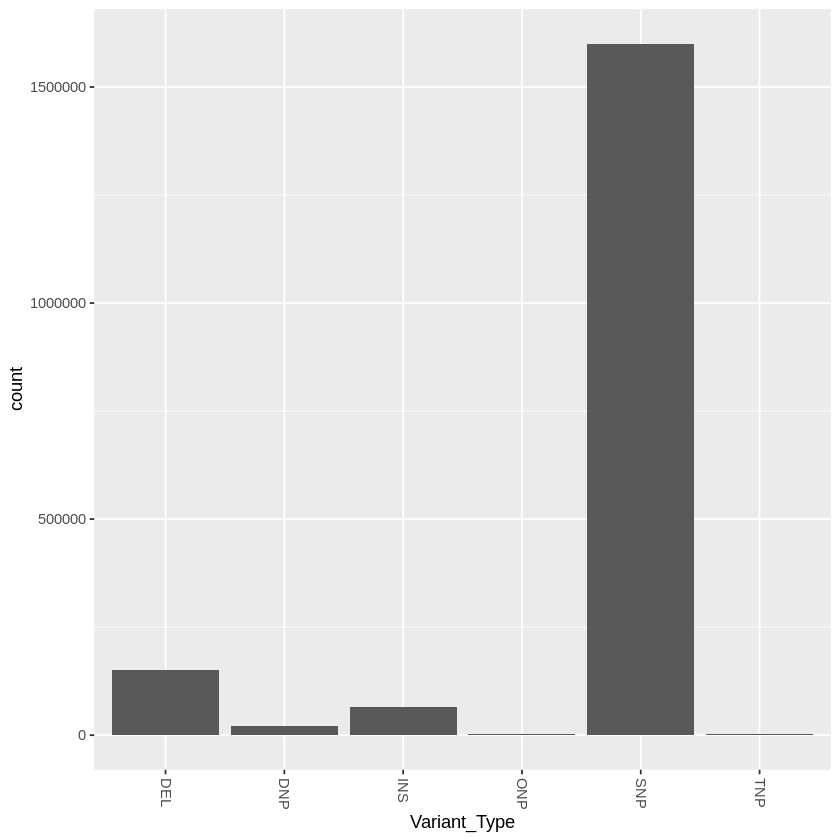

In [12]:
# How many types are there?
length(unique(mutation_data[['Variant_Type']]))
# What are they called?
unique(mutation_data[['Variant_Type']])

# How is the data distributed across these types?
ggplot(mutation_data, aes(x=Variant_Type)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -90))

The majority of our muitations are SNPs- Single nucleotide polymorphisms.

#### Tumor Sample Barcode

The Tumor Sample Barcode should contain an ID that can be used to link to clinical data.

In [14]:
length(unique(mutation_data[['Tumor_Sample_Barcode']]))
head(mutation_data[['Tumor_Sample_Barcode']])

[1] 171195

[1] "GENIE-JHU-00006-00185" "GENIE-JHU-00006-00185" "GENIE-JHU-00006-00185"
[4] "GENIE-JHU-00006-00185" "GENIE-JHU-00006-00185" "GENIE-JHU-00006-00185"

#### Mutation_Status

An assessment of the mutation as somatic, germline, LOH, post transcriptional modification, unknown, or none

[1] 3

[1] "Somatic" "SOMATIC" "UNKNOWN"

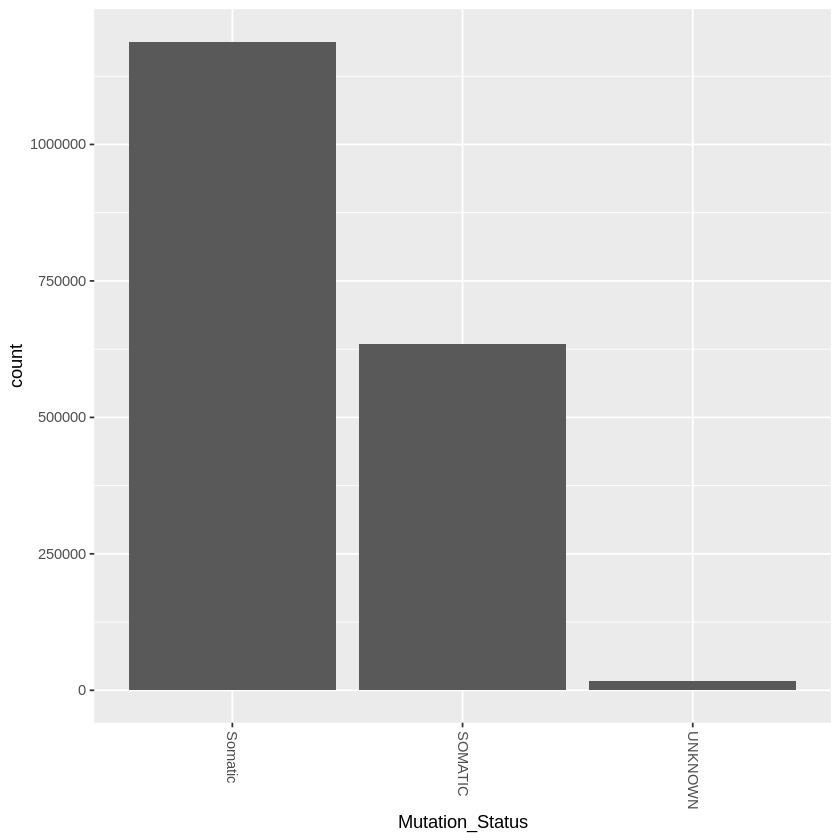

In [72]:
# How many statuses are there?
length(unique(mutation_data[['Mutation_Status']]))
# What are they called?
unique(mutation_data[['Mutation_Status']])

# How is the data distributed across these statuses?
ggplot(mutation_data, aes(x=Mutation_Status)) + geom_bar() + scale_x_discrete(guide = guide_axis(angle = -90))

Disregarding the formatting differences, we see that all mutations known mutations are Somatic, with very few being of unknown origin.

#### Sequence_Source

Molecular assay type used to produce the analytes used for sequencing

In [74]:
# How many statuses are there?
length(unique(mutation_data[['Sequence_Source']]))
# What are they called?
unique(mutation_data[['Sequence_Source']])

[1] 1

[1] NA

The sequence source is apparently unknown. Good to know (Irony intended).

#### Round-off

From examining the columns, we have found that Sequence_Source, Mutation_Status and NCBI_Build are uninformative. The remaining columns have data that might be informative.